# Exercise 2: Logistic Regression

In [2]:
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_3/ex2/'
sys.path.append(path_to_modules)
from costFunction import costFunction
from mapFeature import mapFeature
from gradient import gradient
from predict import predict
from plotDecisionBoundary import plotDecisionBoundary
from plotData import plotData

import scipy.optimize as op
import matplotlib.pyplot as plt
import numpy as np

## Load Data
  The first two columns contains the X values and the third column
  contains the label (y).

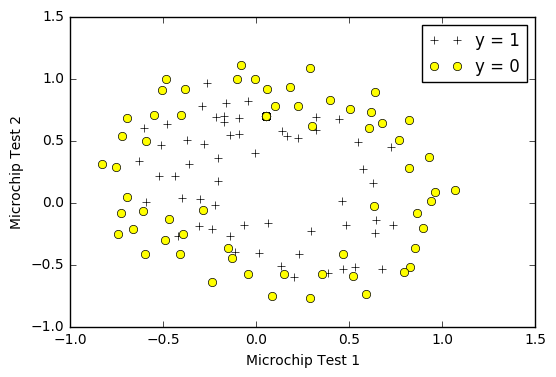

In [3]:
data = np.loadtxt(path_to_modules + 'ex2data2.txt', delimiter =",")

X = data[:, 0:2] #x refers to the population size in 10,000s
y = data[:, 2] #y refers to the profit in $10,000s

m = y.size #umber of training examples

y = y.reshape((m,1))

line_pos, line_neg = plotData(X, y, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

plt.legend(handles=[line_pos,line_neg])

plt.show(block=False)

## Part 1: Regularized Logistic Regression
  In this part, you are given a dataset with data points that are not
  linearly separable. However, you would still like to use logistic
  regression to classify the data points.

  To do so, you introduce more features to use -- in particular, you add
  polynomial features to our data matrix (similar to polynomial
  regression).

In [4]:
# Add Polynomial Features
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled

X = mapFeature(X[:,0], X[:,1])


# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
reg_lambda = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunction(initial_theta, X, y, reg_lambda), gradient(initial_theta, X, y, reg_lambda)

print('Cost at initial theta (zeros): #f\n', cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print(' #f \n', grad[0:6])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1],1))
cost, grad = costFunction(test_theta, X, y, 10), gradient(test_theta, X, y, reg_lambda)

print('\nCost at test theta (with lambda = 10): #f\n', cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:\n')
print(' #f \n', grad[0:6])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at initial theta (zeros): #f
 0.69314718056
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

 #f 
 [[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]
 [  3.76648474e-02]]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Cost at test theta (with lambda = 10): #f
 3.16450933162
Expected cost (approx): 3.16

Gradient at test theta - first five values only:

 #f 
 [[ 0.34604507]
 [ 0.08508073]
 [ 0.11852457]
 [ 0.1505916 ]
 [ 0.01591449]
 [ 0.16811439]]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



## Part 2: Regularization and Accuracies
  Optional Exercise:
  In this part, you will get to try different values of lambda and
  see how regularization affects the decision coundart

  Try the following values of lambda (0, 1, 10, 100).

  How does the decision boundary change when you vary lambda? How does
  the training set accuracy vary?

optimal theta [ 1.27271026  0.62529964  1.18111686 -2.01987399 -0.91743189 -1.43166928
  0.12393228 -0.36553118 -0.35725404 -0.17516292 -1.45817008 -0.05098417
 -0.61558558 -0.27469164 -1.19271299 -0.24217841 -0.20603303 -0.04466177
 -0.27778947 -0.29539513 -0.45645982 -1.04319153  0.02779373 -0.29244865
  0.01555759 -0.32742404 -0.14389149 -0.92467489]


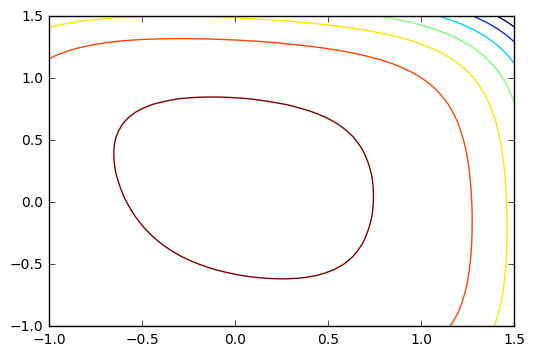

Train Accuracy:  83.0508474576
Expected accuracy (with lambda = 1): 83.1 (approx)



In [5]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1 (you should vary this)
reg_lambda = 1

# Optimize
Result = op.minimize(fun = costFunction, x0 = initial_theta, args = (X, y, reg_lambda, True), method = 'TNC', jac = gradient)
optimal_theta = Result.x

print("optimal theta", optimal_theta)

#Plot Boundary
boundary_line = plotDecisionBoundary(optimal_theta, X, y)

#plt.legend(handles=[line_pos,line_neg, boundary_line])

plt.show(block=False)

theta  = optimal_theta

#Compute accuracy on our training set
p = predict(theta, X)
y = y.reshape((m))

print("Train Accuracy: ",np.multiply(np.mean((p == y).astype(int)), 100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n')